In [128]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    import spacy
    nlp = spacy.load('en', disable=['parser', 'ner'])
    doc = nlp(clean(s))
    s = ' '.join([token.lemma_ for token in doc])
    return s

import re
def clean(tweet):
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', tweet)  # URLs
    tweet = re.sub(r'RT', '', tweet)  # RTs
    tweet = re.sub(r'(?:@[\w_]+)', '', tweet)  # user-mentions
    tweet = re.sub(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)', '', tweet)  # hashtags
    tweet = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', '', tweet)  # numbers
    return tweet

In [129]:
X = pd.read_csv('tweets.csv').tweet
y = pd.read_csv('tweets.csv').label

In [130]:
X.map(clean_twitter)

0         : here be CNN on Sharia law . -PRON- can be stone or have -PRON- hand cut ...
1         : LOOK obama Clinton crony ILLEGALLY arm & amp ; train muslim terrorist in...
2                                                        :     from    get crown      …
3                                          : say ' Islam be peace ' , or else !        
4                                                  :   all aboard the Trump Train !   🚂
5         : FLASHBACK & gt;&gt ; Judicial Watch Releases Huma Abedin Deposition test...
6         : follow FBI presser ,   say “ the system be rig ! "   & amp ;   weigh in ...
7                                    : trump : " -PRON- be run Against a Rigged Press "
8         : literally % of Hillary supporter -PRON- see online be astroturfe spammer...
9                                                                    :   \n Islam . ...
10             : . \n PSYCHO - MOTHER \n Hillary at -PRON- most EVIL . \n\n   \n    h …
11        : the unthinkable have

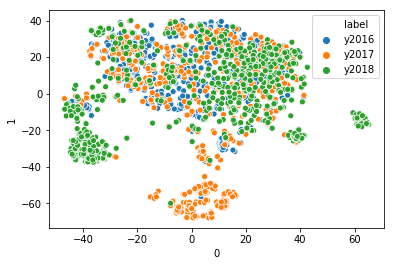

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

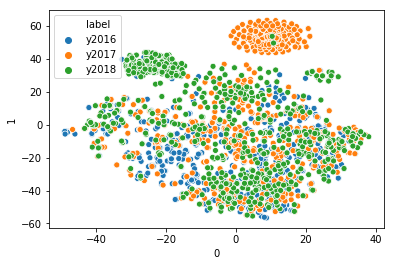

In [132]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

/home/arilam/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['PRON', 'make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


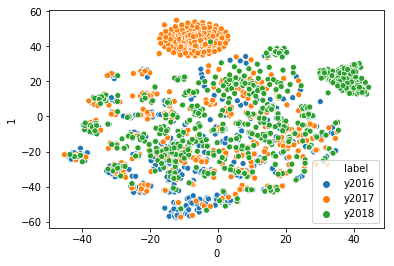

In [133]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way?
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words='english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)